In [53]:
import math
import scipy as sp
import numpy as np
import scipy.special
%matplotlib inline 
import pandas as pd
import pylab as plt
import pandas as pd 
import pylab as plt 
import numpy as np
import os
%run ~/Documents/simulations/num_mixed_model/simu_test/preamble.py
%matplotlib inline
import seaborn as sns
import math
import subprocess as sp
sns.set_style('white')
def vb(th):
    return(0.5 * (1. + sp.special.erf((1 - th) / np.sqrt(2))))


def vs(th):
    return(vb(1 - th))


def Sigmoid(A, T):
    return(1. / (1. + np.exp(-float(A) / float(T))))


def sb(th):
    return(np.exp(-0.5 * (1 - th)**2) / np.sqrt(2 * math.pi) +
           0.5 * (1 - th) * (1 + sp.special.erf((1 - th) / np.sqrt(2))))


def ss(th):
    return(sb(1 - th))

def s2b(th):
    return (1 - th) * np.exp(-0.5 * (1 - th)**2) / np.sqrt(2 * math.pi) + 0.5 * (1 + (1 - th)**2) * (1 + sp.special.erf((1 - th) / np.sqrt(2)))
def s2s(th):
    return s2b(1 - th)

def ProbaM1(dA1, dA2, beta): 
    return(1/(1 + np.exp(-beta*dA1) + np.exp(-beta*dA2)))
def ProbaM2(dA1, dA2, beta): 
    return(1/(1 + np.exp(beta*dA1) + np.exp(-beta*dA2 + beta*dA1)))
def ProbaM3(dA1, dA2, beta): 
    return(1/(1 + np.exp(beta*dA2 - beta*dA1) + np.exp(beta*dA2)))
def ScoreBuy(fbofs, th):
    return(min(1, vs(th)/(vb(th)*fbofs))*sb(th))
def ScoreSell(fbofs, th):
    return(min(1, vb(th)/vs(th)*fbofs)*ss(th))
def ScoreBuy2(fbofs, th):
    return(min(1, vs(th)/vb(th)*fbofs)*s2b(th))
def ScoreSell2(fbofs, th): 
    return(min(1, vb(th)/(vs(th))*fbofs)*s2s(th))
def Score2(fBoverfS, th, pb): 
    return((1 - pb)*ScoreSell2(fBoverfS, th) + pb*(ScoreBuy2(fBoverfS, th)))
def Score(fBoverfS, th, pb): 
    return((1 - pb)*ScoreSell(fBoverfS, th) + pb*(ScoreBuy(fBoverfS, th)))
def FirstOrderMoment(dA1, dA2, fbOverfS, thetas, beta, pb):
    fbOverfS1 = fbOverfS[0]
    fbOverfS2 = fbOverfS[1]
    fbOverfS3 = fbOverfS[2]
    thetas1 = thetas[0]
    thetas2 = thetas[1]
    thetas3 = thetas[2]
    return np.array([Score(fbOverfS1,thetas1,pb)*ProbaM1(dA1,dA2,beta)-Score(fbOverfS2,thetas2,pb)*ProbaM2(dA1,dA2,beta)-dA1, Score(fbOverfS1,thetas1,pb)*ProbaM1(dA1,dA2,beta)-Score(fbOverfS3,thetas3,pb)*ProbaM3(dA1,dA2,beta)-dA2])

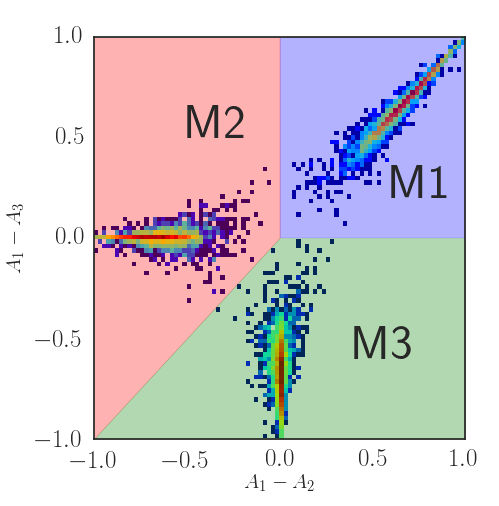

In [76]:
# The preferences space

# importing the packages to plot ellipses 
from matplotlib import patches
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
xv = np.linspace(-1,1,100)
ax.set_xlabel('$A_1 - A_2$')
ax.set_ylabel('$A_1 - A_3$')

# Plotting the regions where the markets are prefered
xpos = np.linspace(0,1,100)
ax.fill_between(xpos,0,1, alpha = 0.3, color='blue', label='Prefer market 1')
ax.fill_between(-xpos,1,-xpos, alpha = 0.3, color='red', label='Prefer market 2')
ax.fill_betweenx(-xpos,-xpos,1,
                 alpha = 0.3, color='green', label='Prefer market 3')
NumericalData = AnalyseDistribution('../../simulations/SiuVsVsAnalytics/Neutral_Markets0.15r0.05dits_snapshot2.dat')
NumericalData.PlotLogHist(colorBarDisplayed=False)
#NumericalData.GenerateContourPLot(CovMatrix=np.array([[0.336263, 0.00595186], [0.00595186, 0.0119037]]),X0=0,Y0=-0.675055)
#NumericalData.GenerateContourPLot(CovMatrix=np.array([[0.0119037, 0.00595186], [0.00595186, 0.336263]]),Y0=0,
#                             X0=-0.675055)
#NumericalData.GenerateContourPLot(CovMatrix=np.array([[0.336263, 0.330311], [0.330311, 0.336263]]),Y0=0.675055,
#                             X0=0.675055)
# Plot the ellipses
BottomEllipse = patches.Ellipse((0., -0.6), 0.2, 0.5,
                     angle=0, linewidth=6, fill=False, zorder=2)
LeftEllipse = patches.Ellipse((-0.6, 0),  0.5,0.2,
                     angle=0, linewidth=6, fill=False, zorder=2)
TopRightEllipse = patches.Ellipse((0.6, 0.6),  0.5,0.2,
                     angle=45, linewidth=6, fill=False, zorder=2)
#ax.add_patch(BottomEllipse)
#ax.add_patch(LeftEllipse)
#ax.add_patch(TopRightEllipse)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.tight_layout()
plt.savefig('/home/k1327990/these/02_Chapters/ThreeMarkets/ExplainationPreferenesDistribution.pdf')

# Simulations for three markets

In [49]:
NumericalData.PrintLog()
Segregation2.PrintLog()
Segregation3.PrintLog()

Multiagents simulation for agents with
fixed buys/sell preferences interactiong
interacting with three markets
pb1 = 0.2; pb2 = 0.8
th1 = 0.5; th2 = 0.5; th3 = 0.5
sigma = 1; mbuy = 11; msell = 10
Number of itterations = 100000
r = 0.05
T = 0.15
alpha = 1
fraction of fast agents = 0
Multiagents simulation for agents with
fixed buys/sell preferences interactiong
interacting with three markets
pb1 = 0.2; pb2 = 0.8
th1 = 0.3; th2 = 0.5; th3 = 0.6
sigma = 1; mbuy = 11; msell = 10
Number of itterations = 100000
r = 0.01
T = 0.21
alpha = 1
fraction of fast agents = 0
Multiagents simulation for agents with
fixed buys/sell preferences interactiong
interacting with three markets
pb1 = 0.2; pb2 = 0.8
th1 = 0.3; th2 = 0.35; th3 = 0.7
sigma = 1; mbuy = 11; msell = 10
Number of itterations = 100000
r = 0.01
T = 0.225
alpha = 1
fraction of fast agents = 0


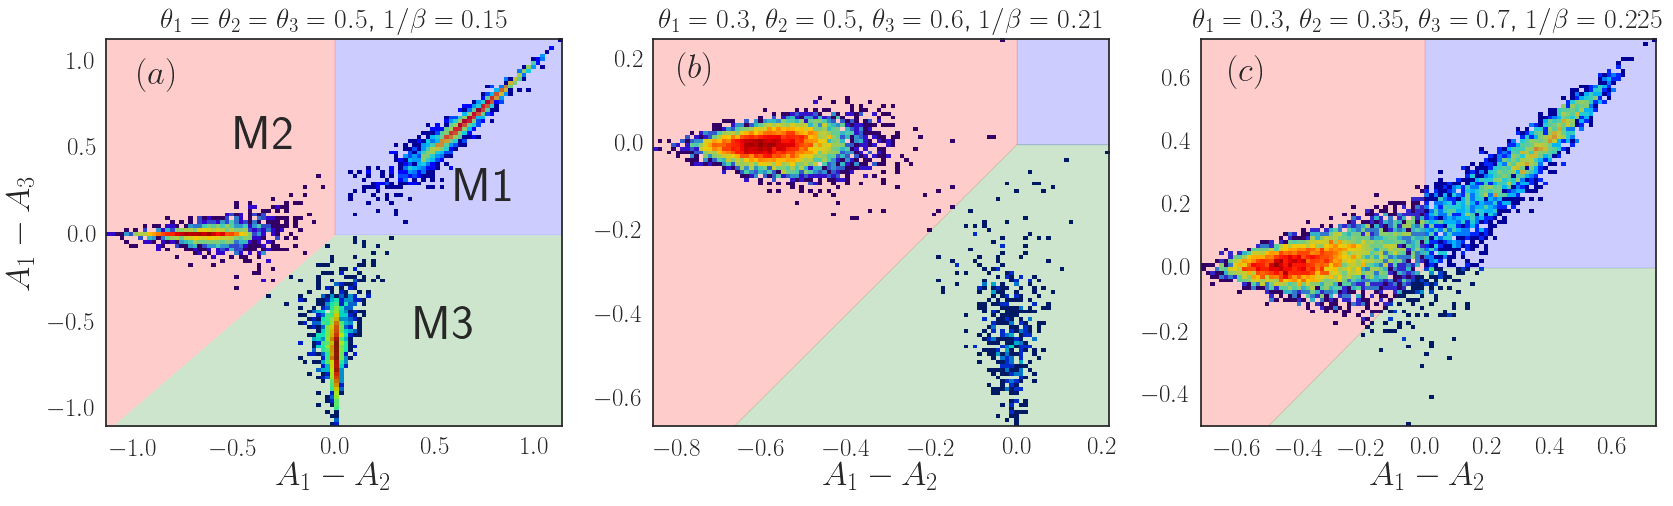

In [111]:
def PlotTheZones(al=0.3):
    xpos = np.linspace(0,2,100)
    plt.fill_between(xpos,0,2, alpha = al, color='blue', label='Prefer market 1')
    plt.fill_between(-xpos,2,-xpos, alpha = al, color='red', label='Prefer market 2')
    plt.fill_betweenx(-xpos,-xpos,1.5,
                 alpha = al, color='green', label='Prefer market 3')
plt.figure(figsize=(20,5))
plt.subplot(131)
NumericalData = AnalyseDistribution('../../simulations/SiuVsVsAnalytics/Neutral_Markets0.15r0.05dits_snapshot2.dat')
NumericalData.PlotLogHist(colorBarDisplayed=False)
plt.xlabel('$A_1 - A_2$', fontsize=25)
plt.ylabel('$A_1 - A_3$', fontsize=25)
PlotTheZones(al=0.2)
plt.text(-0.5,0.5,"M2", fontsize=35)
plt.text(0.6,0.2,"M1", fontsize=35)
plt.text(0.4,-0.6,"M3", fontsize=35)
plt.text(-0.98, 0.88,"$(a)$", fontsize=25)
plt.title("$\\theta_1 = \\theta_2 = \\theta_3=0.5$, $1/\\beta = 0.15$", fontsize=20)
# Plotting the regions where the markets are prefered

plt.subplot(132)
Segregation2 = AnalyseDistribution('../../simulations/SiuVsVsAnalytics/Segregationth1_0d3th2_0d5th3_0d6_Temp_0.21dits_snapshot200.dat')
Segregation2.PlotLogHist(colorBarDisplayed=False)
plt.ylabel('')
plt.xlabel('$A_1 - A_2$', fontsize=25)
plt.title("$\\theta_1=0.3$, $\\theta_2 =0.5$, $\\theta_3=0.6$, $1/\\beta = 0.21$", fontsize=20)
PlotTheZones(al=0.2)
plt.text(-0.8, 0.16,"$(b)$", fontsize=25)
plt.subplot(133)
plt.title("$\\theta_1=0.3$, $\\theta_2 =0.35$, $\\theta_3=0.7$, $1/\\beta = 0.225$", fontsize=20)
Segregation3 = AnalyseDistribution('../../simulations/SiuVsVsAnalytics/Segregationth1_0d3th2_0d35th3_0d7_Temp_'+str(0.225)+'dits_snapshot400.dat', pb=0.8)
Segregation3.PlotLogHist(colorBarDisplayed=False)
plt.xlabel('$A_1 - A_2$', fontsize=25)
plt.ylabel('')
plt.text(-0.63, 0.6,"$(c)$", fontsize=25)
PlotTheZones(al=0.2)
plt.savefig('/home/k1327990/these/02_Chapters/ThreeMarkets/SimulationsIntro.pdf')

## Code to run the simulations 

In [6]:
import subprocess as sp
import os
def LaunchSimulation(NSnapshot=1000,
                     nsteps=10000,
                     fparam=0.01,
                     alpha=1,
                     T=0.11,
                     pb1=0.2,
                     pb2=0.8,
                     nagents=20000,
                     th1=0.5,
                     th2=0.3,
                     th3=0.7,
                     fastfrac=0,
                     outdist='findist.dat',
                     mbuy=11,
                     msell=10,
                     sigma=1,
                     mar_ts='no',
                     prefix='auto',
                     ExecutableName='./Simu3Markets.out',
                     NumTimeSeries=-1):
        prefix_cl = prefix
        print(ExecutableName)
        torun = [ExecutableName,
                 '--nagents', str(nagents),
                 '--NSnapshot', str(NSnapshot),
                 '--th1', str(th1),
                 '--th2', str(th2),
                 '--th3', str(th3),
                 '--nsteps', str(nsteps),
                 '--fparam', str(fparam),
                 '--pb1', str(pb1),
                 '--pb2', str(pb2),
                 '--T', str(T),
                 '--outdist', str(outdist),
                 '--mbuy', str(mbuy),
                 '--msell', str(msell),
                 '--sigma', str(sigma),
                 '--alpha', str(alpha),
                 '--prefix', prefix_cl,
                 '--tradersts',str(NumTimeSeries)]
        outfile = open(prefix_cl+'.log', 'w+')
        return(sp.Popen(torun, stdout=outfile))

In [25]:
# Launching the simualtion for beta = 1/0.252
#
os.chdir('/home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/')
simTeq0d252 = LaunchSimulation(NSnapshot=1000,
                     nsteps=100000,
                     fparam=0.01,
                     alpha=1,
                     T=0.252,
                     pb1=0.2,
                     pb2=0.8,
                     nagents=20000,
                     th1=0.5,
                     th2=0.5,
                     th3=0.5,
                     fastfrac=0,
                     outdist='findist.dat',
                     mbuy=11,
                     msell=10,
                     sigma=1,
                     mar_ts='no',
                     prefix='fairMarketsTeq0d252',
                     ExecutableName='./Simu3Markets.out',
                     NumTimeSeries=-1)

./Simu3Markets.out


In [50]:
NumericalData.PrintLog()

Multiagents simulation for agents with
fixed buys/sell preferences interactiong
interacting with three markets
pb1 = 0.2; pb2 = 0.8
th1 = 0.5; th2 = 0.5; th3 = 0.5
sigma = 1; mbuy = 11; msell = 10
Number of itterations = 100000
r = 0.05
T = 0.15
alpha = 1
fraction of fast agents = 0


In [51]:
# Launching the simualtion for beta = 1/0.245
#
os.chdir('/home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/')
simTeq0d245 = LaunchSimulation(NSnapshot=1000,
                     nsteps=100000,
                     fparam=0.01,
                     alpha=1,
                     T=0.15,
                     pb1=0.2,
                     pb2=0.8,
                     nagents=20000,
                     th1=0.5,
                     th2=0.5,
                     th3=0.5,
                     fastfrac=0,
                     outdist='findist.dat',
                     mbuy=11,
                     msell=10,
                     sigma=1,
                     mar_ts='no',
                     prefix='fairMarketsTeq0d15r001',
                     ExecutableName='./Simu3Markets.out',
                     NumTimeSeries=-1)

./Simu3Markets.out


In [26]:
# Launching the simualtion for beta = 1/0.245
#
os.chdir('/home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/')
simTeq0d245 = LaunchSimulation(NSnapshot=1000,
                     nsteps=100000,
                     fparam=0.01,
                     alpha=1,
                     T=0.245,
                     pb1=0.2,
                     pb2=0.8,
                     nagents=20000,
                     th1=0.5,
                     th2=0.5,
                     th3=0.5,
                     fastfrac=0,
                     outdist='findist.dat',
                     mbuy=11,
                     msell=10,
                     sigma=1,
                     mar_ts='no',
                     prefix='fairMarketsTeq0d245',
                     ExecutableName='./Simu3Markets.out',
                     NumTimeSeries=-1)

./Simu3Markets.out


In [27]:
# Launching the simualtion for beta = 1/0.27
#
os.chdir('/home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/')
simTeq0d27 = LaunchSimulation(NSnapshot=1000,
                     nsteps=100000,
                     fparam=0.01,
                     alpha=1,
                     T=0.27,
                     pb1=0.2,
                     pb2=0.8,
                     nagents=20000,
                     th1=0.5,
                     th2=0.5,
                     th3=0.5,
                     fastfrac=0,
                     outdist='findist.dat',
                     mbuy=11,
                     msell=10,
                     sigma=1,
                     mar_ts='no',
                     prefix='fairMarketsTeq0d27',
                     ExecutableName='./Simu3Markets.out',
                     NumTimeSeries=-1)

./Simu3Markets.out


In [9]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
class AnalyseDistribution:
    def __init__(self,fname='./First_verif_Temp_r_0d05', pb=.2):
        self.fname_ = fname
        self.pb_ = pb 
        self.ScoreDataFrame_ = pd.read_table(self.fname_)
        self.ScoreOfTheSubsetOfPlayers_ = self.ScoreDataFrame_[self.ScoreDataFrame_.pb == self.pb_] 
        self.Prefix = fname.split('dits_snapshot')[0]
        if '.dat.gz' in fname:
            self.Postfix = '.dat.gz'
        else:
            self.Postfix = '.dat'
        self.my_cmap = plt.cm.jet
        self.dA2Label = '$A_1 - A_2$'
        self.dA3Label = '$A_1 - A_3$'
    def PrintLog(self):
        f = open(self.Prefix+'.log')
        for i in range(14):
            print(f.readline().strip())

    def PlotLogHist(self, colorBarDisplayed=True):
        from matplotlib.colors import LogNorm
        import matplotlib.pyplot as plt
        plt.hist2d(self.ScoreOfTheSubsetOfPlayers_.A1 - self.ScoreOfTheSubsetOfPlayers_.A2,
            self.ScoreOfTheSubsetOfPlayers_.A1-self.ScoreOfTheSubsetOfPlayers_.A3,100,norm=LogNorm(), cmap = self.my_cmap)
        if colorBarDisplayed:
            plt.colorbar()
        self.HistogramLabel()
    
    def GetMarketAggregate(self,id_):
        df = pd.read_csv(self.Prefix+'id_' + str(id_) + '_marketts'+ self.Postfix, sep='\t', index_col=False)
        return np.mean((df.nb/df.ns)[-100:])
    
    def GetAllTheAggregates(self):
        return [self.GetMarketAggregate(m) for m in [1,2,3]]
    
    def PlotHist(self):
        from matplotlib.colors import LogNorm
        import matplotlib.pyplot as plt
        plt.hist2d(self.ScoreOfTheSubsetOfPlayers_.A1 - self.ScoreOfTheSubsetOfPlayers_.A2,
            self.ScoreOfTheSubsetOfPlayers_.A1-self.ScoreOfTheSubsetOfPlayers_.A3,100, cmap = self.my_cmap)
        plt.colorbar()
        self.HistogramLabel()
        
    def PlotOneDHist(self):
        from matplotlib.colors import LogNorm
        import matplotlib.pyplot as plt
        plt.hist(self.ScoreOfTheSubsetOfPlayers_.A1 - self.ScoreOfTheSubsetOfPlayers_.A2,100, normed=True)
        plt.xlabel(self.dA2Label, fontsize = 15)
    def BelongToPeakOne(seld, dA1, dA2):
        if (dA1 < 0) & (dA2 < -dA1) & (dA2 > dA1):
            return True
        else: 
            return False
    def BelongToPeakTwo(self, dA1, dA2):
        if (dA1 < 0) & (dA2 < dA1):
            return True
        elif (dA1 > 0) & (dA2 < 0):
            return True
        else:
            return False
    
    def BelongToPeakThree(seld, dA1, dA2):
        if (dA1 < 0) & (-dA2 < dA1):
            return True
        elif (dA1 > 0) & (dA2 > 0):
            return True
        else:
            return False
    
    def PlotOneDHistAndCovariance(self, means, Variance):
        self.PlotOneDHist()
        def Gaussian(x, mu, var):
            return 1 / np.sqrt(2 * math.pi * var) * np.exp(-(x - mu)**2 / (2. * var))
        xx = np.linspace(-1,1.,1000)
        def WeightOfMyPeak(dA1v,dA2v):
            w1, w2, w3 = self.ReturnPeakSize()
            if self.BelongToPeakOne(dA1v, dA2v): 
                return w1
            if self.BelongToPeakTwo(dA1v, dA2v): 
                return w2
            if self.BelongToPeakThree(dA1v, dA2v): 
                return w3
        
        for mu, s2 in zip(means, Variance):
            w =WeightOfMyPeak(mu[0], mu[1])
            plt.plot(xx,[w*Gaussian(el, mu[0], s2) for el in xx])
                
    def ReturnPeakSize(self):
        dA1 = self.ScoreOfTheSubsetOfPlayers_['A1']-self.ScoreOfTheSubsetOfPlayers_['A2']
        dA2 = self.ScoreOfTheSubsetOfPlayers_['A1']-self.ScoreOfTheSubsetOfPlayers_['A3']
        w1 = np.mean([self.BelongToPeakOne(dA1v, dA2v) for dA1v,dA2v in zip(dA1,dA2)])
        w2 = np.mean([self.BelongToPeakTwo(dA1v, dA2v) for dA1v,dA2v in zip(dA1,dA2)])
        w3 = np.mean([self.BelongToPeakThree(dA1v, dA2v) for dA1v,dA2v in zip(dA1,dA2)])
        return [w1,w2,w3]
    
    def HistogramLabel(self):
        plt.xlabel(self.dA2Label, fontsize = 15)
        plt.ylabel(self.dA3Label, fontsize = 15)
    
    def PlotTwoHistograms(self):
        plt.figure(figsize=(12,5))
        plt.subplot(121)
        plt.title('LogHist')
        self.PlotLogHist()
        plt.subplot(122)
        plt.title('Normal hist')
        self.PlotHist()
    
    def GenerateContourPLot(self,CovMatrix=np.array([[0.330387, 0.325752],[0.325752, 0.331248]]),
                            contour=[0.1],X0=0.676477,Y0=0.676477):
        def CovarianceOfTheMesh(X,Y,Cov):
            Sigma = np.linalg.inv(Cov)
            return(Sigma[0,0]*Y**2 + 2*X*Y*Sigma[1,0] + Sigma[1,1]*X**2)
        delta = 0.01
        x = np.arange(-1, 1.0, delta)
        y = np.arange(-1, 1.0, delta)
        X, Y = np.meshgrid(x, y)
        Z = CovarianceOfTheMesh(X-X0,Y-Y0,np.array(CovMatrix))
        CS = plt.contour(X, Y, Z,contour, colors = 'black', linewidths = [2])
    def GenerateScatterPlot(self):
        plt.scatter(self.ScoreOfTheSubsetOfPlayers_.A1 - self.ScoreOfTheSubsetOfPlayers_.A2,
            self.ScoreOfTheSubsetOfPlayers_.A1-self.ScoreOfTheSubsetOfPlayers_.A3)
        plt.xlim([-1,1])
        plt.ylim([-1,1])

In [35]:
prefix = '/home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/'
SnapshotNumber = 40
TempEq0d27= AnalyseDistribution(prefix + 'fairMarketsTeq0d27dits_snapshot'+str(SnapshotNumber)+'.dat')
TempEq0d27.PlotOneDHist()
plt.show()
TempEq0d252= AnalyseDistribution(prefix + 'fairMarketsTeq0d252dits_snapshot'+str(SnapshotNumber)+'.dat')
TempEq0d252.PlotOneDHist()
plt.show()
TempEq0d245 =AnalyseDistribution(prefix + 'fairMarketsTeq0d245dits_snapshot'+str(SnapshotNumber)+'.dat')
TempEq0d245.PlotOneDHist()

IOError: File /home/k1327990/Documents/simu_3_markets/PlotsForTheThesis/SimulationsThreeFairMarkets/fairMarketsTeq0d27dits_snapshot40.dat does not exist

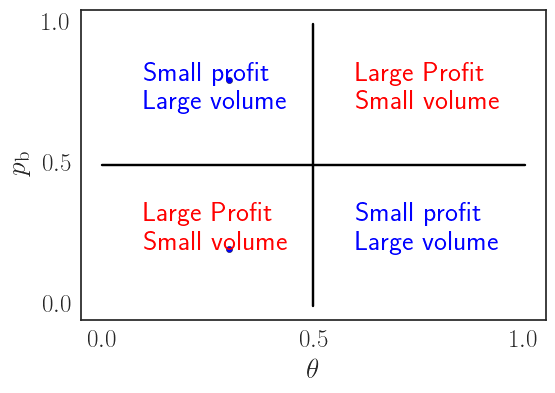

In [147]:
SpLv = 'Small profit \n Large volume'
LpSv = 'Large Profit \n Small volume'
plt.plot([0.5,0.5],[0,1], c='black')
plt.plot([0,1],[0.5,0.5], c='black')
plt.text(0.1,0.7,SpLv, fontsize = 20, color='blue')
plt.text(0.6,0.2,SpLv, fontsize = 20, color='blue')
plt.text(0.1,0.2,LpSv, fontsize = 20, color='red')
plt.text(0.6,0.7,LpSv, fontsize = 20, color='red')
plt.xlabel('$\\theta$', fontsize=20)
plt.ylabel('$p_{\\rm b}$', fontsize=20)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.scatter(0.3,0.2)
plt.scatter(0.3,0.8)